In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline


In [50]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline
matplotlib.style.use('fivethirtyeight')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from scipy.misc import factorial


Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Data Schema Analysis

In [5]:
cat_outcome_df = pd.read_csv("aac_shelter_cat_outcome_eng.csv", low_memory=False)

with pd.option_context('display.max_columns', 30):
    cat_outcome_df

cat_outcome_df.shape

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,count,sex,Spay/Neuter,...,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,1,Male,No,...,2014,7,2014-07,7,2014,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,Adoption,Intact Female,1,Female,No,...,2014,6,2014-08,8,2014,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,Adoption,Spayed Female,1,Female,Yes,...,2014,3,2014-06,6,2014,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,Return to Owner,Spayed Female,1,Female,Yes,...,2013,3,2014-03,3,2014,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,Transfer,Intact Male,1,Male,No,...,2013,12,2014-01,1,2014,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black
5,2 months,A684460,Cat,domestic shorthair,brown,2014-06-02 00:00:00,2014-08-13 15:04:00,2014-08-13T15:04:00,Elsa,NaN,Adoption,Spayed Female,1,Female,Yes,...,2014,6,2014-08,8,2014,Wednesday,15,domestic shorthair,NaN,False,True,tabby,brown,NaN,brown
6,8 months,A673952,Cat,domestic shorthair,brown /white,2013-07-05 00:00:00,2014-03-06 14:29:00,2014-03-06T14:29:00,NaN,SCRP,Transfer,Unknown,1,Female,Yes,...,2013,7,2014-03,3,2014,Thursday,14,domestic shorthair,NaN,False,True,tabby,brown,white,brown
7,5 months,A686497,Cat,domestic shorthair,black,2014-03-22 00:00:00,2014-08-31 15:45:00,2014-08-31T15:45:00,Chester,NaN,Adoption,Neutered Male,1,Male,Yes,...,2014,3,2014-08,8,2014,Sunday,15,domestic shorthair,NaN,False,True,tabby,black,NaN,black
8,2 months,A687965,Cat,domestic shorthair,orange,2014-08-03 00:00:00,2014-10-31 18:29:00,2014-10-31T18:29:00,*Oliver,Foster,Adoption,Neutered Male,1,Male,Yes,...,2014,8,2014-10,10,2014,Friday,18,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
9,1 year,A668547,Cat,domestic mediumhair,black/white,2012-12-04 00:00:00,2013-12-16 13:59:00,2013-12-16T13:59:00,*Preston,Partner,Transfer,Neutered Male,1,Male,Yes,...,2012,12,2013-12,12,2013,Monday,13,domestic mediumhair,NaN,False,True,NaN,black,white,black


(29421, 37)

### Data Analysis

### age_upon_outcome 

In [6]:
cat_outcome_df.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome', 'count', 'sex', 'Spay/Neuter',
       'Periods', 'Period Range', 'outcome_age_(days)', 'outcome_age_(years)',
       'Cat/Kitten (outcome)', 'sex_age_outcome', 'age_group', 'dob_year',
       'dob_month', 'dob_monthyear', 'outcome_month', 'outcome_year',
       'outcome_weekday', 'outcome_hour', 'breed1', 'breed2', 'cfa_breed',
       'domestic_breed', 'coat_pattern', 'color1', 'color2', 'coat'],
      dtype='object')

<Figure size 720x720 with 0 Axes>

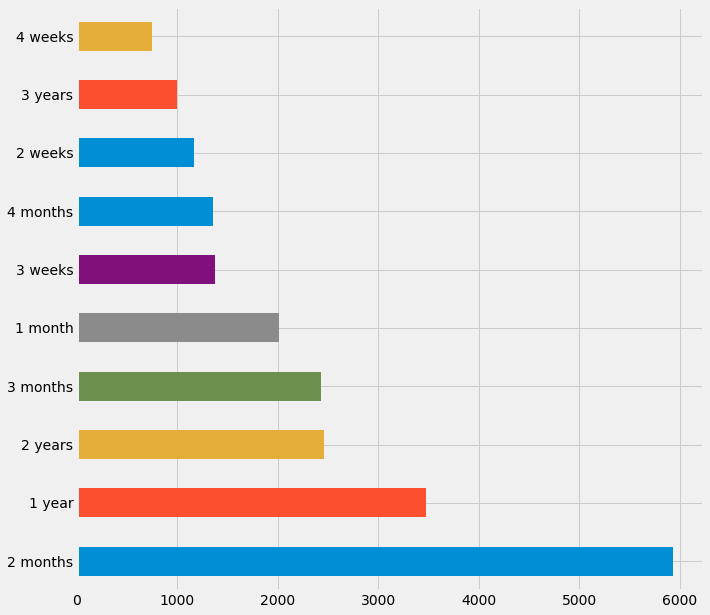

In [7]:
plt.figure(figsize=(10,10))
cat_outcome_df['age_upon_outcome'].value_counts()[:10].plot(kind='barh',)

### breed

<Figure size 1080x360 with 0 Axes>

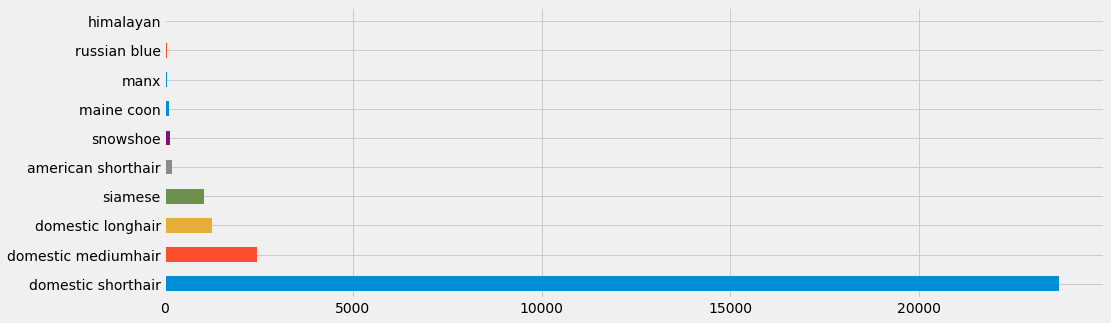

In [8]:
plt.figure(figsize=(15,5))
cat_outcome_df['breed'].value_counts()[:10].plot(kind='barh',)

### color

<Figure size 1224x504 with 0 Axes>

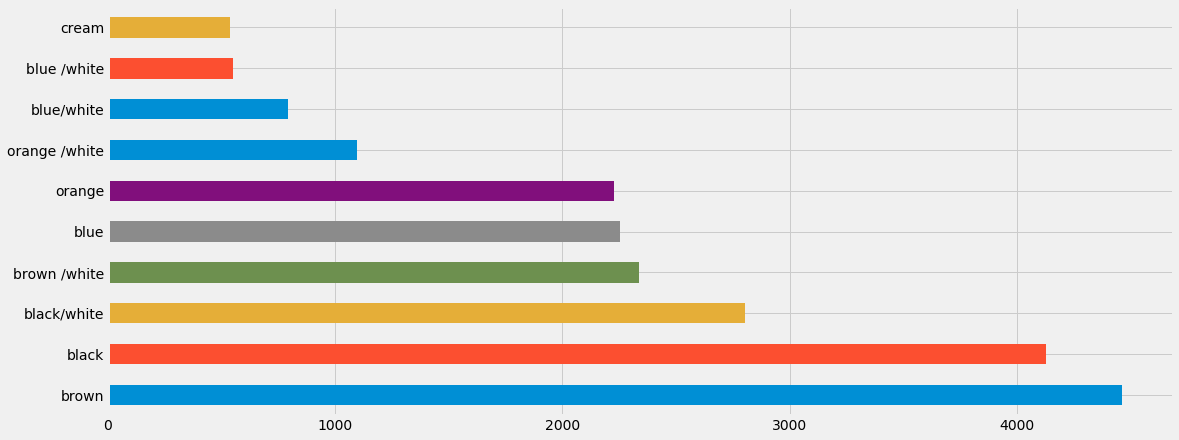

In [9]:
plt.figure(figsize=(17,7))
cat_outcome_df['color'].value_counts()[:10].plot(kind='barh',)

### outcome_type

<Figure size 1224x504 with 0 Axes>

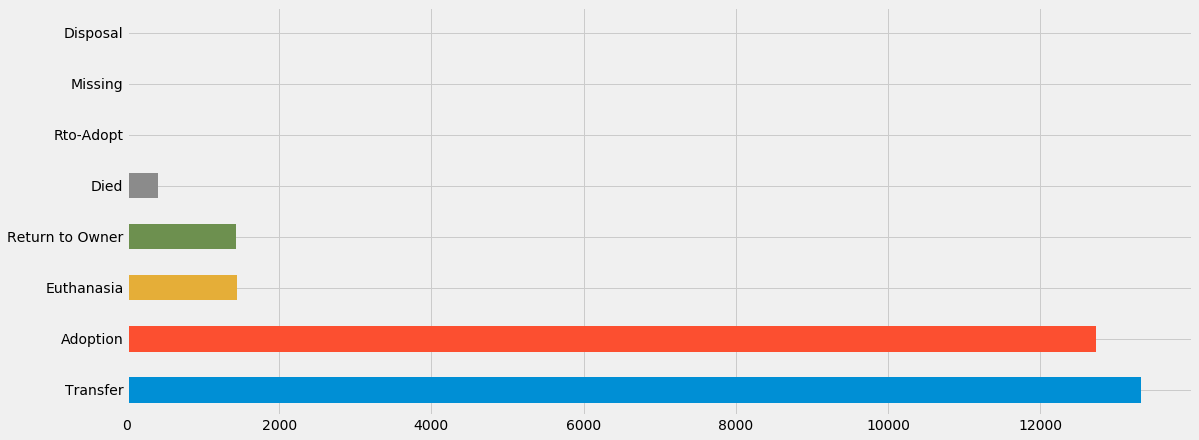

In [10]:
plt.figure(figsize=(17,7))
cat_outcome_df['outcome_type'].value_counts()[:].plot(kind='barh',)

### sex

<Figure size 216x216 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1c14907cf8>,
 [Text(-0.173638,1.08621,'Female'), Text(0.173638,-1.08621,'Male')],
 [Text(-0.0947117,0.592478,'55%'), Text(0.0947118,-0.592478,'45%')])

Text(0.5,1,'Sex ')

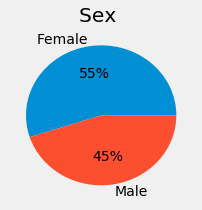

In [11]:
plt.figure(figsize=(3,3))
sex = cat_outcome_df['sex'].value_counts()
plt.pie(sex,labels= sex.index,autopct='%.0f%%')
centre_circle = plt.Circle((0,0),0,color='black', fc='white',linewidth=1.25)
plt.title('Sex ')


### Spay/Neuter

<Figure size 216x216 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1c1498c400>,
 [Text(-0.595419,0.92492,'Yes'), Text(0.595419,-0.92492,'No')],
 [Text(-0.324774,0.504502,'68%'), Text(0.324774,-0.504502,'32%')])

Text(0.5,1,'Spay/Neuter')

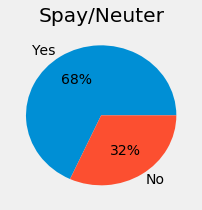

In [12]:
plt.figure(figsize=(3,3))
spay_neuter = cat_outcome_df['Spay/Neuter'].value_counts()
plt.pie(spay_neuter,labels= spay_neuter.index,autopct='%.0f%%')
centre_circle = plt.Circle((0,0),0,color='black', fc='white',linewidth=1.25)
plt.title('Spay/Neuter')


### outcome_weekday

<Figure size 1224x504 with 0 Axes>

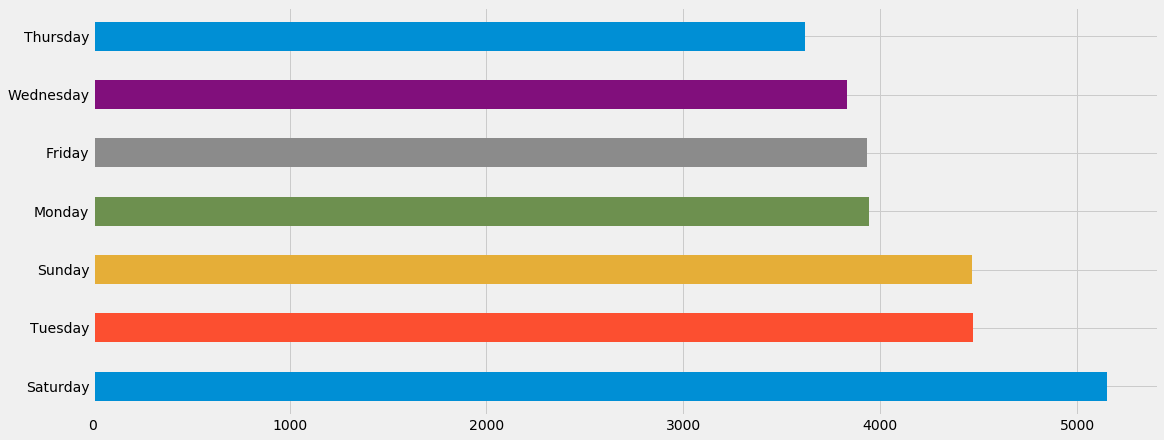

In [13]:
plt.figure(figsize=(17,7))
cat_outcome_df['outcome_weekday'].value_counts()[:7].plot(kind='barh',)

### outcome_hour

Text(0,0.5,'Number of Tickets')

Text(0.5,0,'Day')

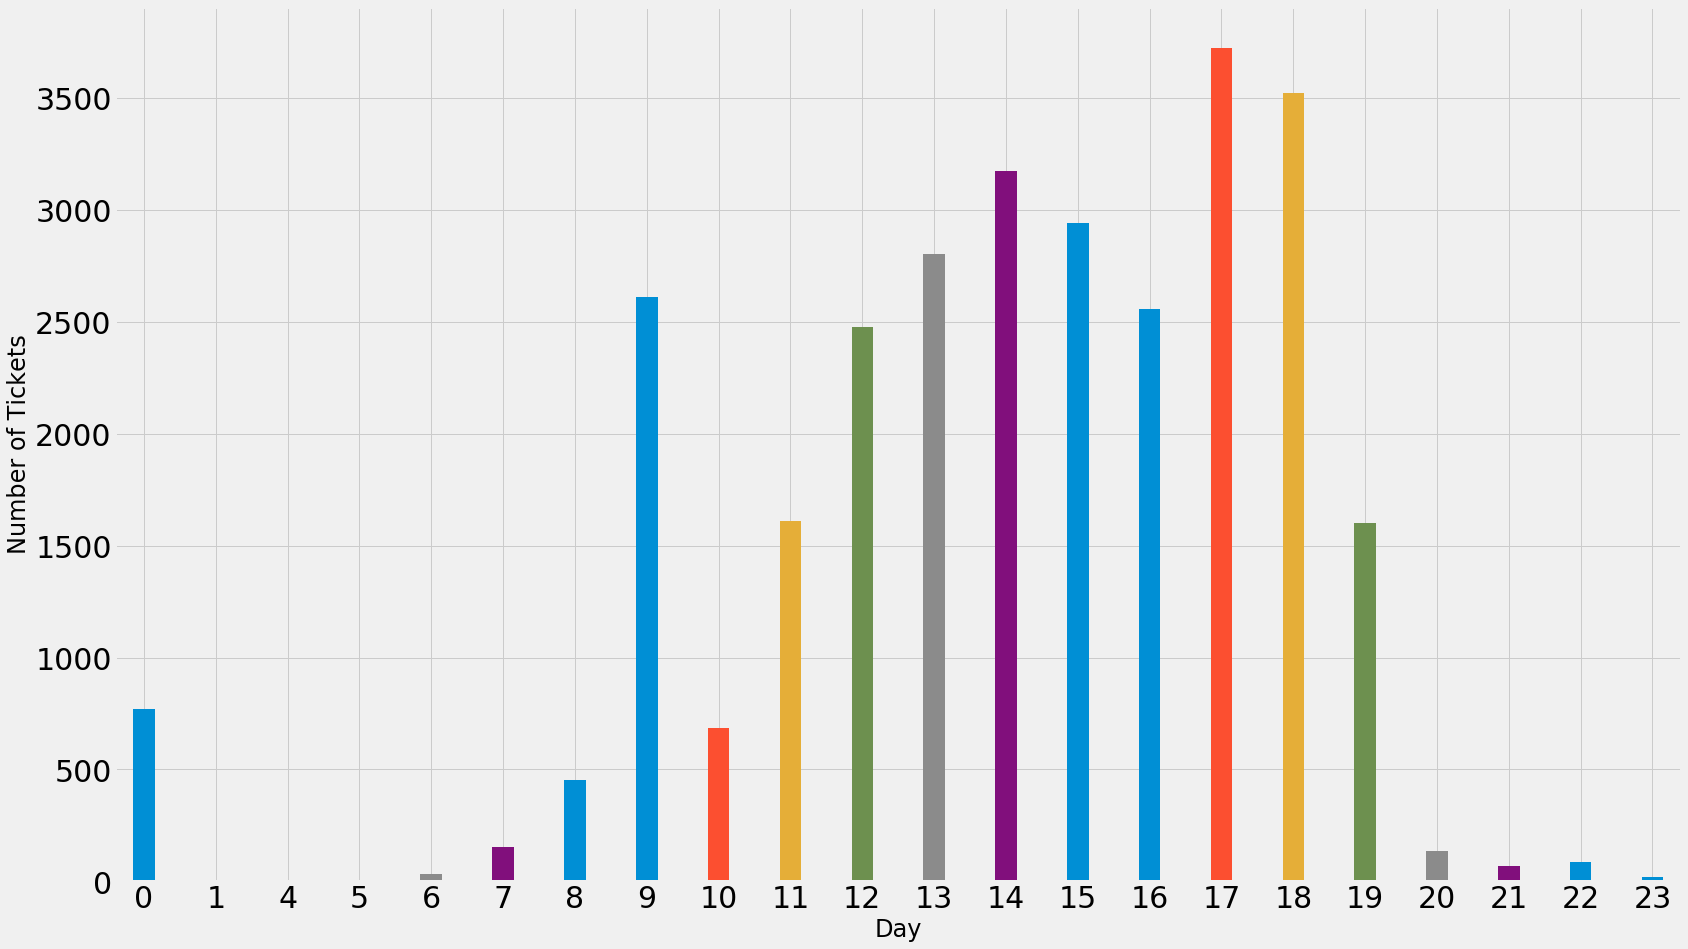

In [14]:
ax = cat_outcome_df['outcome_hour'].value_counts(sort=False).sort_index().plot.bar(figsize=(25,15), fontsize=30, rot=0, width=0.3)
ax.set_ylabel('Number of Tickets', fontsize=24)
ax.set_xlabel('Day', fontsize=24)

### name

<Figure size 1224x504 with 0 Axes>

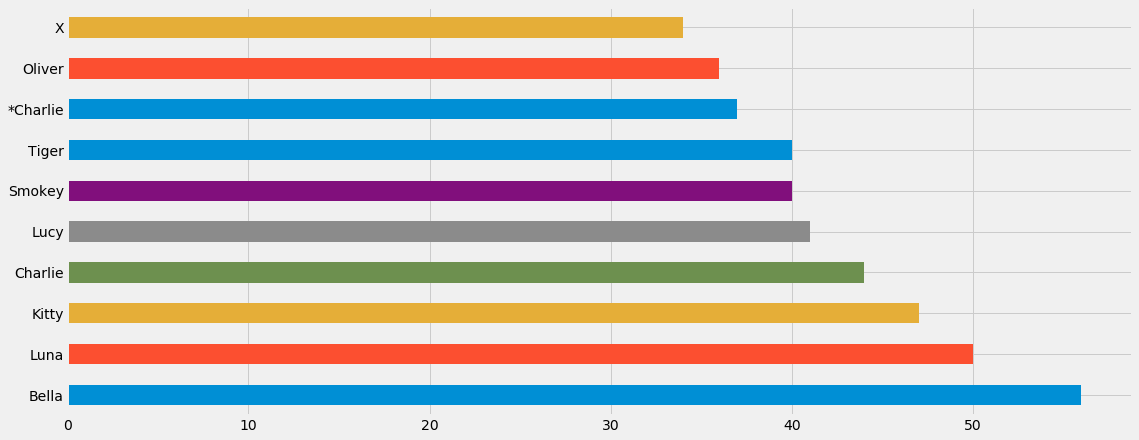

In [15]:
plt.figure(figsize=(17,7))
cat_outcome_df['name'].value_counts()[:10].plot(kind='barh',)

### outcome_year

<Figure size 1224x504 with 0 Axes>

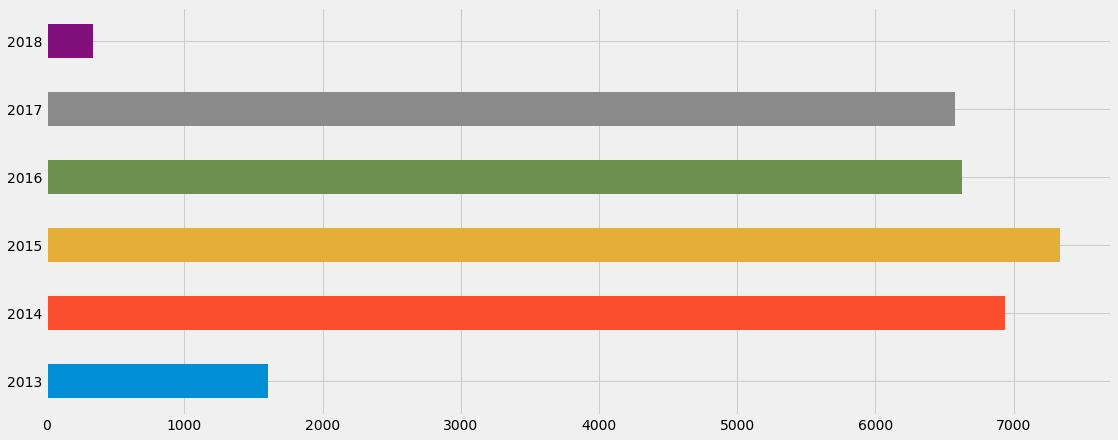

In [16]:
plt.figure(figsize=(17,7))
cat_outcome_df['outcome_hour'] = cat_outcome_df['outcome_hour'].astype(integer)
cat_outcome_df['outcome_month'] = cat_outcome_df['outcome_month'].astype(integer)
cat_outcome_df['outcome_year'] = cat_outcome_df['outcome_year'].astype(integer)
cat_outcome_df['outcome_year'].value_counts(sort=False).sort_index().plot(kind='barh',)

There are 121728 names.


<Figure size 1440x1440 with 0 Axes>

(-0.5, 1199.5, 599.5, -0.5)

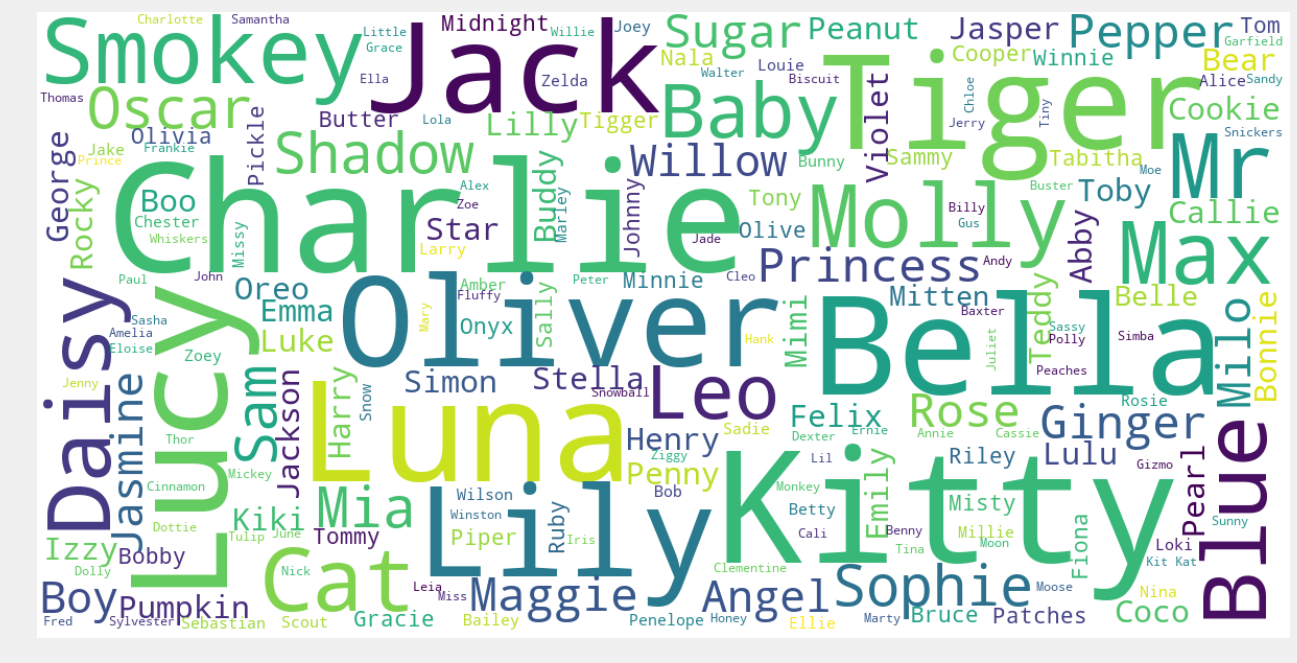

In [17]:
text = " ".join(str(name) for name in cat_outcome_df['name'].dropna())
print ("There are {} names.".format(len(text)))


wordcloud = WordCloud(max_font_size=50, background_color="white", scale=3).generate(text)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##  Poisson Distribution

### Died

In [18]:
def set_not_adoption(outcome):
    if outcome != 'Adoption':
        return 'Not Adoption'
    return 'Adoption'
    
cat_outcome_df['adoption_binary'] = cat_outcome_df['outcome_type'].apply(set_not_adoption)

<Figure size 216x216 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1c226ecac8>,
 [Text(-0.230667,1.07554,'Not Adoption'), Text(0.230667,-1.07554,'Adoption')],
 [Text(-0.125818,0.58666,'57%'), Text(0.125818,-0.58666,'43%')])

Text(0.5,1,'Adopted/Not Adopted')

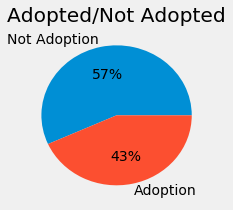

In [19]:
plt.figure(figsize=(3,3))
adoption_binary = cat_outcome_df['adoption_binary'].value_counts()
plt.pie(adoption_binary,labels= adoption_binary.index,autopct='%.0f%%')
centre_circle = plt.Circle((0,0),0,color='black', fc='white',linewidth=1.25)
plt.title('Adopted/Not Adopted')

Text(0,0.5,'Number of Tickets')

Text(0.5,0,'Category')

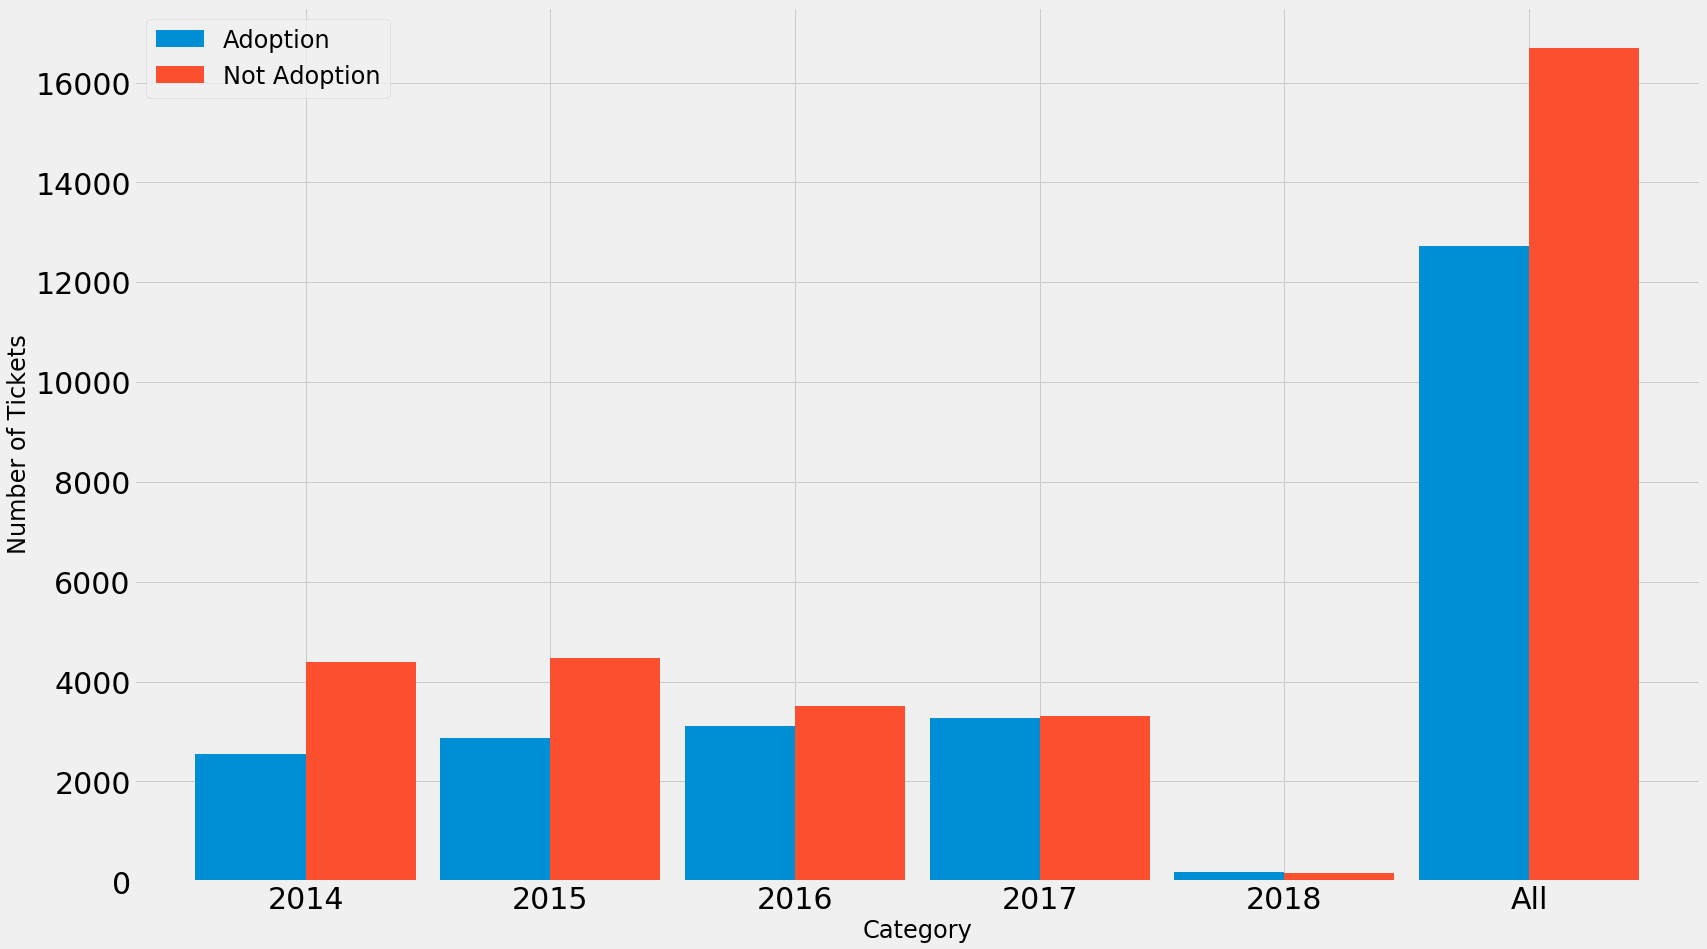

In [20]:
year_adoption_df = pd.crosstab(cat_outcome_df['outcome_year'],cat_outcome_df['adoption_binary'],margins=True)

ax = year_adoption_df.iloc[1:9, :-1].plot.bar(figsize=(25,15), fontsize=30, rot=0, width=0.9)
ax.set_ylabel('Number of Tickets', fontsize=24)
ax.set_xlabel('Category', fontsize=24)
ax.legend( prop={'size': 24})

###  Cat Deaths Per Month

In [311]:
cat_outcome_df['outcome_monthyear'] = cat_outcome_df.outcome_year.astype(str).str.cat("-" + cat_outcome_df.outcome_month.astype(str))

died_animals = cat_outcome_df.loc[cat_outcome_df['outcome_type'] == 'Died']

died_animals = died_animals.loc[:, [ 'outcome_monthyear', 'outcome_type' ]]
died_animals = died_animals.dropna()
died_animals.isnull().values.any()
died_animals.head()


False

,outcome_monthyear,outcome_type
15,2014-9,Died
97,2014-5,Died
143,2013-11,Died
205,2014-5,Died
224,2014-7,Died


2013-11    4
2013-12    1
2014-1     1
2014-10    3
2014-11    6
Name: outcome_monthyear, dtype: int64

Text(0,0.5,'Number of deaths per month')

Text(0.5,0,'Months')

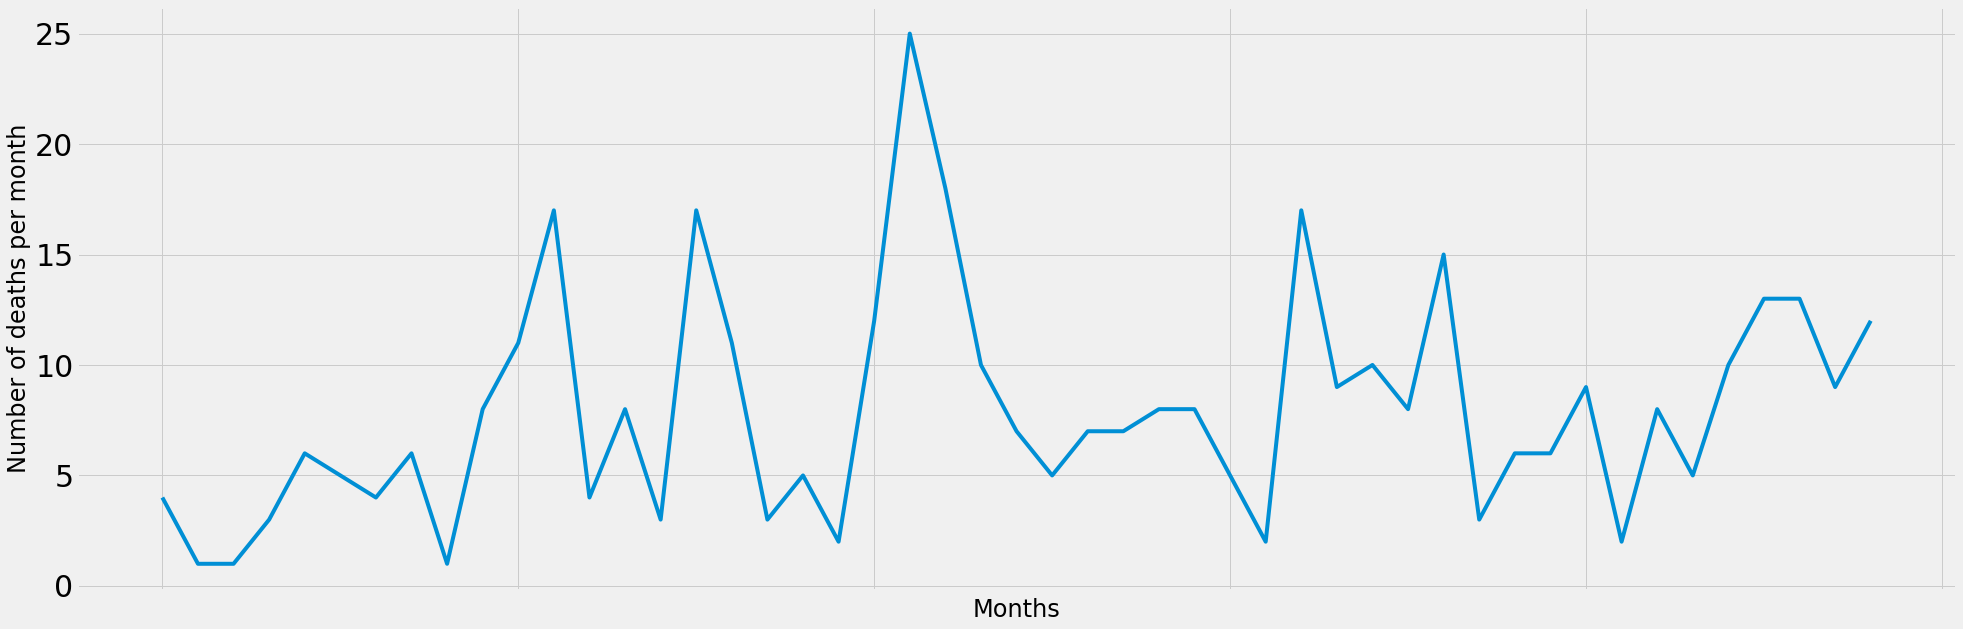

In [318]:
# died_animals_per_monthyear = pd.crosstab(died_animals['outcome_monthyear'], died_animals['outcome_type'], margins=True)
died_animals_per_monthyear = died_animals['outcome_monthyear'].value_counts(sort=False).sort_index()[1:-1]
died_animals_per_monthyear.head()
ax = died_animals_per_monthyear.plot(figsize=(30,10), fontsize=30, rot=0)
ax.set_ylabel('Number of deaths per month', fontsize=24)
ax.set_xlabel('Months', fontsize=24)


8.0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  


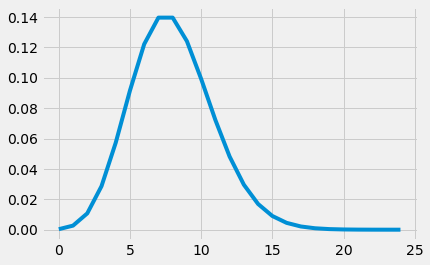

In [319]:
import decimal
decimal.getcontext().prec = 100
_lambda = round(died_animals_per_monthyear.mean(),0)
_lambda
adoptions_k = np.arange(0, 25,1)
poisson_distributions = np.exp(-_lambda) * np.power(_lambda, adoptions_k) / factorial(adoptions_k)
plt.plot(adoptions_k, poisson_distributions)
plt.show()

### Cat Deaths Per Year

In [322]:
died_animals = cat_outcome_df.loc[cat_outcome_df['outcome_type'] == 'Died']

died_animals = died_animals.loc[:, [ 'outcome_year', 'outcome_type' ]]
died_animals = died_animals.dropna()
died_animals.isnull().values.any()
died_animals.head()

False

,outcome_year,outcome_type
15,2014,Died
97,2014,Died
143,2013,Died
205,2014,Died
224,2014,Died


Text(0,0.5,'Number of deaths per year')

Text(0.5,0,'Years')

AttributeError: 'AxesSubplot' object has no attribute 'xticklabels'

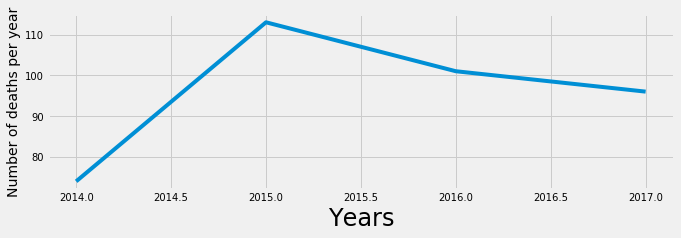

In [327]:
died_animals_per_year = died_animals['outcome_year'].value_counts(sort=False).sort_index()[1:-1]
ax = died_animals_per_year.plot(figsize=(10,3), fontsize=10)
ax.set_ylabel('Number of deaths per year', fontsize=14)
ax.set_xlabel('Years', fontsize=24)
ax.set_xticklabels(ax.xticklabels.astype(int))

96.0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  


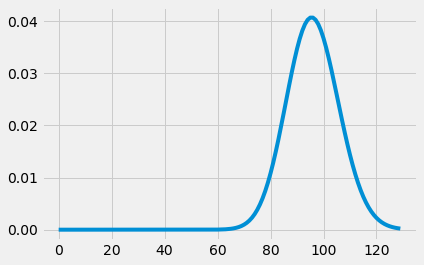

In [309]:
import decimal
decimal.getcontext().prec = 100
_lambda = round(died_animals_per_year.mean(),0)
_lambda
adoptions_k = np.arange(0, 130,1)
poisson_distributions = np.exp(-_lambda) * np.power(_lambda, adoptions_k) / factorial(adoptions_k)
plt.plot(adoptions_k, poisson_distributions)
plt.show()

### Logistic Regression on Adoption/Not adopted

In [24]:
logistic_rows = cat_outcome_df.loc[:, [ 'Spay/Neuter', 'sex', 'adoption_binary', 'outcome_age_(years)' ]]
logistic_rows.head()

,Spay/Neuter,sex,adoption_binary,outcome_age_(years)
0,No,Male,Not Adoption,0.038356
1,No,Female,Adoption,0.082192
2,Yes,Female,Adoption,0.246575
3,Yes,Female,Not Adoption,1.000000
4,No,Male,Not Adoption,0.057534


In [25]:
logistic_rows = pd.get_dummies(logistic_rows)
logistic_rows = logistic_rows.astype(float)

logistic_rows['Intercept'] = 1.0
logistic_rows.head()


,outcome_age_(years),Spay/Neuter_No,Spay/Neuter_Yes,sex_Female,sex_Male,adoption_binary_Adoption,adoption_binary_Not Adoption,Intercept
0,0.038356,1.0,0.0,0.0,1.0,0.0,1.0,1.0
1,0.082192,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.246575,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,1.000000,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,0.057534,1.0,0.0,0.0,1.0,0.0,1.0,1.0


### Logistic SKLearn

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(logistic_rows.loc[:, ['Intercept',
                                        'Spay/Neuter_Yes',
                                        'sex_Male',
                                        'outcome_age_(years)']],
                                                    logistic_rows.loc[:, ['adoption_binary_Adoption']], test_size=0.30, 
                                                    random_state=101)

In [27]:
x_train.head()
y_train.head()


,Intercept,Spay/Neuter_Yes,sex_Male,outcome_age_(years)
24168,1.0,1.0,1.0,8.000000
18517,1.0,0.0,1.0,0.082192
8566,1.0,0.0,0.0,0.246575
28127,1.0,1.0,0.0,0.164384
14989,1.0,0.0,0.0,5.000000


,adoption_binary_Adoption
24168,0.0
18517,0.0
8566,1.0
28127,1.0
14989,0.0


In [28]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.84      0.58      0.69      5030
        1.0       0.61      0.86      0.71      3797

avg / total       0.74      0.70      0.70      8827



### Logistics STatsModel

In [30]:
import statsmodels.discrete.discrete_model as sm
model = sm.Logit(logistic_rows.loc[:, ['adoption_binary_Adoption']], 
                 logistic_rows.loc[:, ['Intercept',
                                        'Spay/Neuter_Yes',
                                        'sex_Male',
                                        'outcome_age_(years)']])
res = model.fit()
print(res.summary())


Optimization terminated successfully.
         Current function value: 0.531203
         Iterations 6
                              Logit Regression Results                              
Dep. Variable:     adoption_binary_Adoption   No. Observations:                29421
Model:                                Logit   Df Residuals:                    29417
Method:                                 MLE   Df Model:                            3
Date:                      Sat, 13 Apr 2019   Pseudo R-squ.:                  0.2235
Time:                              10:06:37   Log-Likelihood:                -15629.
converged:                             True   LL-Null:                       -20126.
                                              LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.6008      0.041 

### Linear Regression on Hour (Statsmodel)

In [31]:
linear_regresion_rows = cat_outcome_df.loc[:, ['outcome_month', 'outcome_weekday','outcome_hour', 'outcome_age_(days)', 'Spay/Neuter', 'sex', 'adoption_binary' ]]
linear_regresion_rows.isnull().values.any()
linear_regresion_rows.columns
linear_regresion_rows.shape
linear_regresion_rows.head()

False

Index(['outcome_month', 'outcome_weekday', 'outcome_hour',
       'outcome_age_(days)', 'Spay/Neuter', 'sex', 'adoption_binary'],
      dtype='object')

(29421, 7)

,outcome_month,outcome_weekday,outcome_hour,outcome_age_(days),Spay/Neuter,sex,adoption_binary
0,7,Tuesday,16,14,No,Male,Not Adoption
1,8,Thursday,18,30,No,Female,Adoption
2,6,Sunday,17,90,Yes,Female,Adoption
3,3,Friday,14,365,Yes,Female,Not Adoption
4,1,Thursday,19,21,No,Male,Not Adoption


In [32]:
cat_outcome_df["animal_type"].value_counts()

Cat    29421
Name: animal_type, dtype: int64

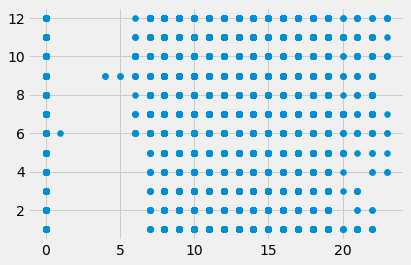

In [33]:
plt.scatter(linear_regresion_rows['outcome_hour'], linear_regresion_rows['outcome_month'])


In [34]:
import statsmodels.api as sm # import statsmodels 



# x = pd.get_dummies(linear_regresion_rows.loc[:, ['Spay/Neuter', 'sex', 'adoption_binary' ]])
# x = pd.get_dummies(linear_regresion_rows.loc[:, ['sex' ]])
# x = pd.get_dummies(linear_regresion_rows.loc[:, ['outcome_weekday' ]])
# x
# x = x.join(linear_regresion_rows.loc[:, ['outcome_age_(days)']])

x = linear_regresion_rows.loc[:, ['outcome_month']]
# x = linear_regresion_rows['outcome_month']

# x = x.join(linear_regresion_rows.loc[:, ['outcome_month']])


# y = linear_regresion_rows['outcome_hour']

y = linear_regresion_rows.loc[:, ['outcome_hour']]
# y = y.astype(integer)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()
type(predictions)
type(y)

# print(classification_report(y,predictions))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           outcome_hour   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                 1.040e+05
Date:                Sat, 13 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:06:37   Log-Likelihood:                -98242.
No. Observations:               29421   AIC:                         1.965e+05
Df Residuals:                   29420   BIC:                         1.965e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
outcome_month     1.6429      0.005    322.484      0.000       1.633       1.653
==============================================================================
Omnibus:                       77.771   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.388
Skew:                          -0.112   Prob(JB):                     2.59e-17
Kurtosis:                       2.888   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

pandas.core.series.Series

pandas.core.frame.DataFrame

### Scikit-Learn

In [35]:
model = LinearRegression()
scores = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(x, y)):
 model.fit(x.iloc[train,:], y.iloc[train,:])
 score = model.score(x.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[-0.000288686970564056, -0.0003353412410884715, -0.0002704359614336127, -0.00018815131462068813, -6.739083141105162e-05, -0.00018004044572639266, -7.825304359165841e-06, -0.0003233814899308296, -0.00031145495700135584, -0.00030266782147747584]


### ANOVA

In [36]:
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov

In [37]:
formula = 'outcome_hour ~ C(outcome_type) + C(color) + C(outcome_type):C(color)'
model = ols(formula, cat_outcome_df).fit()
aov_table = anova_lm(model, typ=2)
# eta_squared(aov_table)
omega_squared(aov_table)
# model.summary()
# print(aov_table)

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 153, but rank is 51
  'rank is %d' % (J, J_), ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1071, but rank is 299
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F),omega_sq
C(outcome_type),-0.000010,7.0,-1.032557e-07,1.000000e+00,-0.000267
C(color),-23138.542983,153.0,-1.093897e+01,1.000000e+00,-0.069616
C(outcome_type):C(color),34879.317445,1071.0,2.355648e+00,4.856888e-34,0.055333
Residual,351005.311632,25389.0,NaN,NaN,NaN


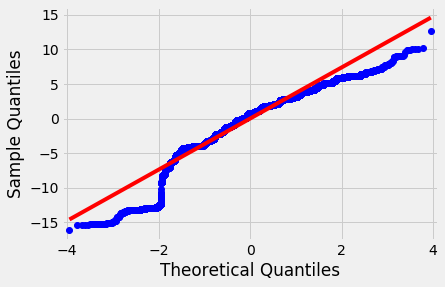

0               Transfer
1               Adoption
2               Adoption
3        Return to Owner
4               Transfer
5               Adoption
6               Transfer
7               Adoption
8               Adoption
9               Transfer
10              Transfer
11              Transfer
12              Adoption
13              Adoption
14              Transfer
15                  Died
16              Adoption
17              Transfer
18              Adoption
19              Transfer
20              Transfer
21              Transfer
22              Transfer
23              Transfer
24              Transfer
25              Adoption
26            Euthanasia
27       Return to Owner
28              Transfer
29            Euthanasia
              ...       
29391           Adoption
29392    Return to Owner
29393           Adoption
29394           Adoption
29395           Adoption
29396           Adoption
29397           Adoption
29398           Adoption
29399           Adoption


In [38]:
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()
cat_outcome_df.outcome_type
# fig = interaction_plot(cat_outcome_df.outcome_type, cat_outcome_df.color, cat_outcome_df.outcome_hour,
#              colors=['red','blue'], markers=['D','^'], ms=10)

,sum_sq,df,F,PR(>F),omega_sq
C(outcome_weekday),5232.195408,6.0,59.149913,3.868714e-73,0.011714
outcome_month,1.678579,1.0,0.113858,7.357964e-01,-0.000030
C(outcome_weekday):outcome_month,316.413973,6.0,3.577057,1.518651e-03,0.000519
Residual,433540.140282,29407.0,NaN,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           outcome_hour   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     28.95
Date:                Sat, 13 Apr 2019   Prob (F-statistic):           6.65e-72
Time:                        10:06:47   Log-Likelihood:                -81322.
No. Observations:               29421   AIC:                         1.627e+05
Df Residuals:                   29407   BIC:                         1.628e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        14.0627      0.149     94.400      0.000      13.771      14.355
C(outcome_weekday)[T.Monday]                     -0.3113      0.212     -1.470      0.142      -0.727       0.104
C(outcome_weekday)[T.Saturday]                    0.4116      0.205      2.006      0.045       0.010       0.814
C(outcome_weekday)[T.Sunday]                      0.4514      0.204      2.213      0.027       0.052       0.851
C(outcome_weekday)[T.Thursday]                   -0.4672      0.219     -2.135      0.033      -0.896      -0.038
C(outcome_weekday)[T.Tuesday]                    -0.3845      0.207     -1.861      0.063      -0.789       0.021
C(outcome_weekday)[T.Wednesday]                  -0.4473      0.213     -2.100      0.036      -0.865      -0.030
outcome_month                                    -0.0372      0.019     -1.982      0.048      -0.074      -0.000
C(outcome_weekday)[T.Monday]:outcome_month        0.1115      0.027      4.115      0.000       0.058       0.165
C(outcome_weekday)[T.Saturday]:outcome_month      0.0346      0.026      1.328      0.184      -0.016       0.086
C(outcome_weekday)[T.Sunday]:outcome_month        0.0460      0.026      1.769      0.077      -0.005       0.097
C(outcome_weekday)[T.Thursday]:outcome_month      0.0492      0.028      1.765      0.078      -0.005       0.104
C(outcome_weekday)[T.Tuesday]:outcome_month       0.0078      0.026      0.299      0.765      -0.044       0.059
C(outcome_weekday)[T.Wednesday]:outcome_month     0.0368      0.027      1.363      0.173      -0.016       0.090
==============================================================================
Omnibus:                     6278.498   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14572.980
Skew:                          -1.207   Prob(JB):                         0.00
Kurtosis:                       5.462   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

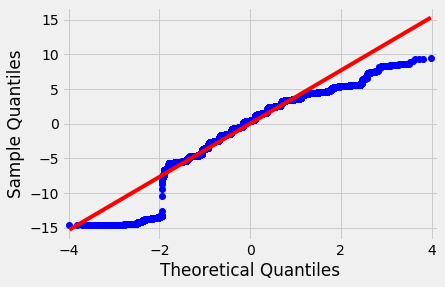

In [39]:
formula = 'outcome_hour ~ C(outcome_weekday) + outcome_month + C(outcome_weekday):outcome_month'
model = ols(formula, cat_outcome_df).fit()
aov_table = anova_lm(model, typ=2)
# eta_squared(aov_table)
omega_squared(aov_table)
model.summary()
# print(aov_table)
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  'rank is %d' % (J, J_), ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 21, but rank is 8
  'rank is %d' % (J, J_), ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 126, but rank is 112
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F),omega_sq
C(outcome_weekday),133.643442,6.0,2.283772,4.370734e-02,0.000260
C(outcome_hour),92.097069,21.0,0.449658,8.914991e-01,-0.000389
C(outcome_weekday):C(outcome_hour),3553.445419,126.0,2.891581,2.701124e-22,0.008032
Residual,285610.462679,29284.0,NaN,NaN,NaN


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          outcome_month   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.858
Date:                Sat, 13 Apr 2019   Prob (F-statistic):           6.26e-26
Time:                        10:06:48   Log-Likelihood:                -75182.
No. Observations:               29421   AIC:                         1.506e+05
Df Residuals:                   29284   BIC:                         1.518e+05
Df Model:                         136                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 7.4545      0.333     22.392      0.000       6.802       8.107
C(outcome_weekday)[T.Monday]                             -1.0531      0.424     -2.486      0.013      -1.884      -0.223
C(outcome_weekday)[T.Saturday]                            0.4517      0.513      0.880      0.379      -0.554       1.457
C(outcome_weekday)[T.Sunday]                             -0.9340      0.494     -1.889      0.059      -1.903       0.035
C(outcome_weekday)[T.Thursday]                           -0.7745      0.435     -1.782      0.075      -1.626       0.077
C(outcome_weekday)[T.Tuesday]                             0.7345      0.413      1.780      0.075      -0.074       1.543
C(outcome_weekday)[T.Wednesday]                          -0.7763      0.442     -1.755      0.079      -1.643       0.091
C(outcome_hour)[T.1]                                     -0.3391      1.568     -0.216      0.829      -3.413       2.735
C(outcome_hour)[T.4]                                      0.6349      1.480      0.429      0.668      -2.266       3.536
C(outcome_hour)[T.5]                                      1.0437      1.477      0.706      0.480      -1.852       3.939
C(outcome_hour)[T.6]                                      3.5455      2.233      1.588      0.112      -0.832       7.923
C(outcome_hour)[T.7]                                      0.5812      0.678      0.858      0.391      -0.747       1.909
C(outcome_hour)[T.8]                                      0.5576      0.479      1.163      0.245      -0.382       1.497
C(outcome_hour)[T.9]                                     -0.4415      0.369     -1.196      0.232      -1.165       0.282
C(outcome_hour)[T.10]                                    -0.4545      0.455     -0.998      0.318      -1.347       0.438
C(outcome_hour)[T.11]                                    -0.1683      0.385     -0.437      0.662      -0.922       0.586
C(outcome_hour)[T.12]                                    -0.0063      0.376     -0.017      0.987      -0.743       0.731
C(outcome_hour)[T.13]                                    -0.0612      0.369     -0.166      0.868      -0.784       0.661
C(outcome_hour)[T.14]                                    -0.5830      0.363     -1.606      0.108      -1.294       0.128
C(outcome_hour)[T.15]                                     0.5555      0.368      1.510      0.131      -0.166       1.277
C(outcome_hour)[T.16]                                    -0.2569      0.374     -0.687      0.492      -0.990       0.477
C(outcome_hour)[T.17]                                    -0.1303      0.365     -0.357      0.721      -0.845       0.584
C(outcome_hour)[T.18]            

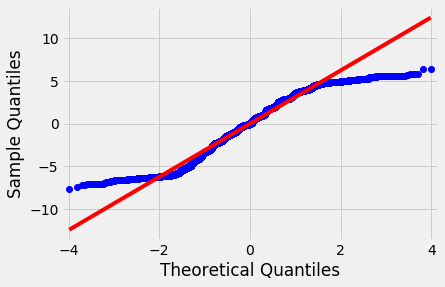

In [40]:
formula = 'outcome_month ~ C(outcome_weekday) + C(outcome_hour) + C(outcome_weekday):C(outcome_hour)'
model = ols(formula, cat_outcome_df).fit()
aov_table = anova_lm(model, typ=2)
# eta_squared(aov_table)
omega_squared(aov_table)
# print(aov_table)
model.summary()

res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()

,sum_sq,df,F,PR(>F),omega_sq
C(outcome_weekday),160.541811,6.0,2.721692,0.012104,0.000351
C(sex),120.867451,1.0,12.294516,0.000455,0.000384
C(outcome_weekday):C(sex),17.258556,6.0,0.292587,0.940749,-0.000144
Residual,289100.375355,29407.0,NaN,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          outcome_month   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.352
Date:                Sat, 13 Apr 2019   Prob (F-statistic):            0.00390
Time:                        10:06:49   Log-Likelihood:                -75361.
No. Observations:               29421   AIC:                         1.508e+05
Df Residuals:                   29407   BIC:                         1.509e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          7.2071      0.067    108.083      0.000       7.076       7.338
C(outcome_weekday)[T.Monday]                      -0.1826      0.094     -1.933      0.053      -0.368       0.003
C(outcome_weekday)[T.Saturday]                    -0.0438      0.089     -0.492      0.623      -0.218       0.131
C(outcome_weekday)[T.Sunday]                      -0.2416      0.092     -2.638      0.008      -0.421      -0.062
C(outcome_weekday)[T.Thursday]                    -0.1383      0.097     -1.433      0.152      -0.327       0.051
C(outcome_weekday)[T.Tuesday]                     -0.0982      0.092     -1.064      0.287      -0.279       0.083
C(outcome_weekday)[T.Wednesday]                   -0.1122      0.096     -1.167      0.243      -0.301       0.076
C(sex)[T.Male]                                     0.0610      0.101      0.605      0.545      -0.136       0.258
C(outcome_weekday)[T.Monday]:C(sex)[T.Male]       -0.0169      0.142     -0.119      0.905      -0.296       0.262
C(outcome_weekday)[T.Saturday]:C(sex)[T.Male]      0.0656      0.134      0.491      0.624      -0.196       0.327
C(outcome_weekday)[T.Sunday]:C(sex)[T.Male]        0.1006      0.138      0.729      0.466      -0.170       0.371
C(outcome_weekday)[T.Thursday]:C(sex)[T.Male]      0.1080      0.146      0.742      0.458      -0.177       0.393
C(outcome_weekday)[T.Tuesday]:C(sex)[T.Male]       0.0991      0.138      0.719      0.472      -0.171       0.369
C(outcome_weekday)[T.Wednesday]:C(sex)[T.Male]     0.1146      0.143      0.802      0.423      -0.166       0.395
==============================================================================
Omnibus:                     2827.897   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1165.726
Skew:                          -0.282   Prob(JB):                    7.34e-254
Kurtosis:                       2.204   Cond. No.                         20.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

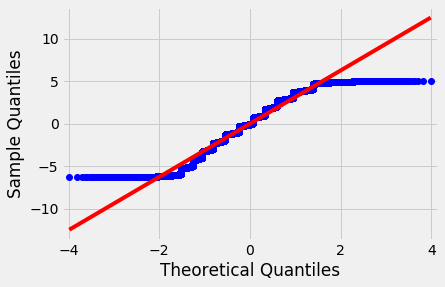

In [41]:
formula = 'outcome_month ~ C(outcome_weekday) + C(sex) + C(outcome_weekday):C(sex)'
model = ols(formula, cat_outcome_df).fit()
aov_table = anova_lm(model, typ=2)
# eta_squared(aov_table)
omega_squared(aov_table)
# print(aov_table)
model.summary()

res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 21, but rank is 20
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F),omega_sq
C(outcome_hour),500.943725,21.0,2.427411,0.000359,0.001018
C(sex),120.158189,1.0,12.227198,0.000472,0.000381
C(outcome_hour):C(sex),99.849685,21.0,0.483839,0.976729,-0.000368
Residual,288701.236776,29378.0,NaN,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          outcome_month   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.695
Date:                Sat, 13 Apr 2019   Prob (F-statistic):            0.00328
Time:                        10:06:49   Log-Likelihood:                -75341.
No. Observations:               29421   AIC:                         1.508e+05
Df Residuals:                   29378   BIC:                         1.511e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                7.1301      0.154     46.335      0.000       6.829       7.432
C(outcome_hour)[T.1]                    -0.5590      1.570     -0.356      0.722      -3.635       2.518
C(outcome_hour)[T.4]                     1.8699      3.139      0.596      0.551      -4.282       8.022
C(outcome_hour)[T.5]                     1.8699      3.139      0.596      0.551      -4.282       8.022
C(outcome_hour)[T.6]                     1.4254      0.755      1.889      0.059      -0.054       2.905
C(outcome_hour)[T.7]                     0.6131      0.396      1.550      0.121      -0.162       1.388
C(outcome_hour)[T.8]                    -0.0017      0.249     -0.007      0.994      -0.489       0.486
C(outcome_hour)[T.9]                    -0.1094      0.173     -0.631      0.528      -0.449       0.230
C(outcome_hour)[T.10]                   -0.2085      0.224     -0.930      0.352      -0.648       0.231
C(outcome_hour)[T.11]                   -0.2291      0.187     -1.222      0.222      -0.596       0.138
C(outcome_hour)[T.12]                    0.1009      0.177      0.571      0.568      -0.245       0.447
C(outcome_hour)[T.13]                   -0.1809      0.174     -1.042      0.298      -0.521       0.160
C(outcome_hour)[T.14]                    0.0080      0.171      0.047      0.963      -0.327       0.343
C(outcome_hour)[T.15]                    0.1347      0.173      0.780      0.435      -0.204       0.473
C(outcome_hour)[T.16]                    0.1023      0.175      0.585      0.559      -0.241       0.445
C(outcome_hour)[T.17]                   -0.0833      0.169     -0.494      0.621      -0.414       0.247
C(outcome_hour)[T.18]                   -0.1207      0.170     -0.711      0.477      -0.453       0.212
C(outcome_hour)[T.19]                   -0.1177      0.186     -0.632      0.528      -0.483       0.248
C(outcome_hour)[T.20]                    0.1355      0.421      0.322      0.748      -0.690       0.961
C(outcome_hour)[T.21]                   -0.7362      0.567     -1.298      0.194      -1.847       0.375
C(outcome_hour)[T.22]                    0.4853      0.461      1.052      0.293      -0.419       1.389
C(outcome_hour)[T.23]                    1.0921      1.056      1.034      0.301      -0.978       3.162
C(sex)[T.Male]                          -0.0121      0.226     -0.054      0.957      -0.456       0.432
C(outcome_hour)[T.1]:C(sex)[T.Male]     -0.5590      1.570     -0.356      0.722      -3.635       2.518
C(outcome_hour)[T.4]:C(sex)[T.Male]      0.0121      4.439      0.003      0.998      -8.689       8.713
C(outcome_hour)[T.5]:C(sex)[T.Male]      0.0121      4.439      0.003      0.998      -8.689       8.713
C(outcome_hour)[T.6]:C(sex)[T.Male]   

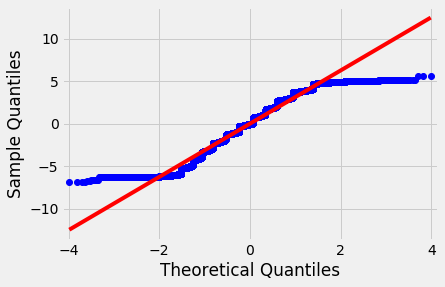

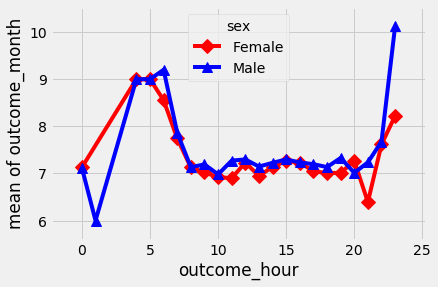

In [42]:
formula = 'outcome_month ~ C(outcome_hour) + C(sex) + C(outcome_hour):C(sex)'
model = ols(formula, cat_outcome_df).fit()
aov_table = anova_lm(model, typ=2)
# eta_squared(aov_table)
omega_squared(aov_table)
# print(aov_table)
model.summary()

res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()

fig = interaction_plot(cat_outcome_df.outcome_hour, cat_outcome_df.sex, cat_outcome_df.outcome_month,
             colors=['red','blue'], markers=['D','^'], ms=10)